###Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from datetime import datetime
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

## Filecoin ($FIL) Data and Analysis

###Universal Variables

In [3]:
# Coin Name
coin = "FIL"
# Date Range For This Coin
dtr=pd.date_range('01.01.2021', '01.01.2022', freq='D')

###Price and Volume

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


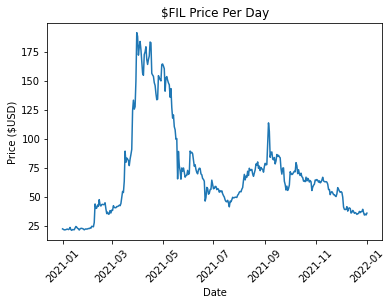

In [ ]:
# Coin Price Data
rawPriceData = pd.read_csv("/content/drive/Shareddrives/IW Spring 2022/CoinMarketCap Data/{}price.csv".format(coin))

priceData = rawPriceData.groupby('Date')['Close'].sum()

filledPriceData=pd.Series(index=dtr)
for i in range (0, priceData.shape[0]):
  filledPriceData[priceData.index[i]] = priceData[i]
filledPriceData = filledPriceData.fillna(0)

fig, ax = plt.subplots()
ax.xaxis_date()
plt.title('${} Price Per Day'.format(coin))
plt.xlabel('Date')
plt.ylabel('Price ($USD)')
plt.xticks(rotation = 45)
plt.plot(filledPriceData.index, filledPriceData)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


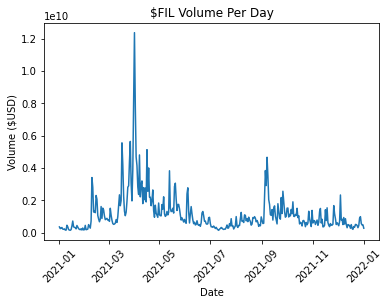

In [ ]:
# Coin Volume Data
volumeData = rawPriceData.groupby('Date')['Volume'].sum()

filledVolumeData=pd.Series(index=dtr)
for i in range (0, volumeData.shape[0]):
  filledVolumeData[volumeData.index[i]] = volumeData[i]
filledVolumeData = filledVolumeData.fillna(0)

fig, ax = plt.subplots()
ax.xaxis_date()
plt.title('${} Volume Per Day'.format(coin))
plt.xlabel('Date')
plt.ylabel('Volume ($USD)')
plt.xticks(rotation = 45)
plt.plot(filledVolumeData.index, filledVolumeData)

###Twitter

In [ ]:
# Twitter Data
rawTwitterData = pd.read_csv("/content/drive/Shareddrives/IW Spring 2022/Twitter Data/{}twitter.csv".format(coin), lineterminator='\n')

# Twitter Posts Per Day
rawTwitterData['Datetime'] = [i.split(" ", 1)[0] for i in rawTwitterData['Datetime']]
rawValueCounts = rawTwitterData['Datetime'].value_counts()
rawValueCounts = rawValueCounts.sort_index()

In [ ]:
filledTwitterData=pd.Series(index=dtr)
for i in range (0, rawValueCounts.shape[0]):
  filledTwitterData[rawValueCounts.index[i]] = rawValueCounts[i]
filledTwitterData = filledTwitterData.fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


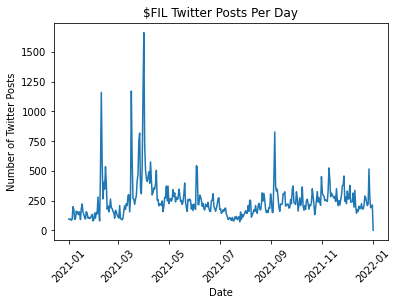

In [ ]:
fig, ax = plt.subplots()
ax.xaxis_date()
plt.title('${} Twitter Posts Per Day'.format(coin))
plt.xlabel('Date')
plt.ylabel('Number of Twitter Posts')
plt.xticks(rotation = 45)
plt.plot(filledTwitterData.index, filledTwitterData)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


(array([737791., 737850., 737911., 737972., 738034., 738095., 738156.]),
 <a list of 7 Text major ticklabel objects>)

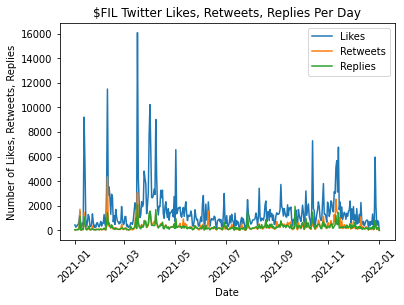

In [ ]:
# Twitter Likes, Retweets, Replies Per Day
lkData = rawTwitterData.groupby('Datetime')['LikeCount'].sum()
rtData = rawTwitterData.groupby('Datetime')['RetweetCount'].sum()
rpData = rawTwitterData.groupby('Datetime')['ReplyCount'].sum()

filledTwitterLikeData=pd.Series(index=dtr)
filledTwitterRetweetData=pd.Series(index=dtr)
filledTwitterReplyData=pd.Series(index=dtr)
for i in range (0, lkData.shape[0]):
  filledTwitterLikeData[lkData.index[i]] = lkData[i]
  filledTwitterRetweetData[rtData.index[i]] = rtData[i]
  filledTwitterReplyData[rpData.index[i]] = rpData[i]
filledTwitterLikeData = filledTwitterLikeData.fillna(0)
filledTwitterRetweetData = filledTwitterRetweetData.fillna(0)
filledTwitterReplyData = filledTwitterReplyData.fillna(0)

fig, ax = plt.subplots()
ax.xaxis_date()
plt.title('${} Twitter Likes, Retweets, Replies Per Day'.format(coin))
plt.xlabel('Date')
plt.ylabel('Number of Likes, Retweets, Replies')
plt.plot(filledTwitterLikeData.index, filledTwitterLikeData, label="Likes")
plt.plot(filledTwitterRetweetData.index, filledTwitterRetweetData, label="Retweets")
plt.plot(filledTwitterReplyData.index, filledTwitterReplyData, label="Replies")
plt.legend(loc="upper right")
plt.xticks(rotation = 45)

In [ ]:
# Twitter Average Sentiment Polarity Per Day
sia = SentimentIntensityAnalyzer()
# custom words added to lexicon
new_words = {
    'moon': 5.0,
    'hold': 5.0,
    'hodl': 4.0,
    'ape': 3.0,
    'rocket': 5.0,
}
sia.lexicon.update(new_words)
rawTwitterData['Text'] = [sia.polarity_scores(i)['compound'] for i in rawTwitterData['Text']]
sentData = rawTwitterData.groupby('Datetime')['Text'].mean()
filledTwitterSentData=pd.Series(index=dtr)
for i in range (0, sentData.shape[0]):
  filledTwitterSentData[sentData.index[i]] = sentData[i]
filledTwitterSentData = filledTwitterSentData.fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


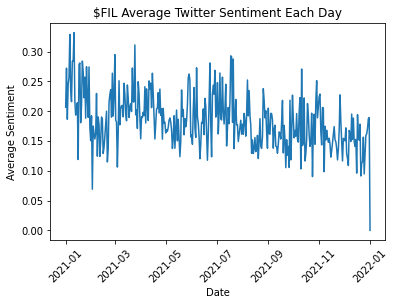

In [ ]:
fig, ax = plt.subplots()
ax.xaxis_date()
plt.title('${} Average Twitter Sentiment Each Day'.format(coin))
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation = 45)
plt.plot(filledTwitterSentData.index, filledTwitterSentData)

###Twitter Correlation Calculations

In [ ]:
# Twitter Correlation Calculations
twitterData = {'Sentiment': filledTwitterSentData.values,
                'Retweets': filledTwitterRetweetData.values,
                'Replies': filledTwitterReplyData.values,
                'Likes': filledTwitterLikeData.values,
                'Posts': filledTwitterData.values        
                }
twitterdf = pd.DataFrame(twitterData,columns=['Sentiment','Retweets','Replies','Likes','Posts'], index=dtr)

In [ ]:
print(f'Post-Volume correlation:      ',np.corrcoef(filledVolumeData,twitterdf['Posts'])[0,1])
print(f'Like-Volume correlation:      ',np.corrcoef(filledVolumeData,twitterdf['Likes'])[0,1])
print(f'Retweets-Volume correlation:  ',np.corrcoef(filledVolumeData,twitterdf['Retweets'])[0,1])
print(f'Replies-Volume:               ',np.corrcoef(filledVolumeData,twitterdf['Replies'])[0,1])
print(f'Sentiment-Volume correlation: ',np.corrcoef(filledVolumeData,twitterdf['Sentiment'])[0,1], '\n')

print(f'Post-Price correlation:       ',np.corrcoef(filledPriceData,twitterdf['Posts'])[0,1])
print(f'Like-Price correlation:       ',np.corrcoef(filledPriceData,twitterdf['Likes'])[0,1])
print(f'Retweets-Price correlation:   ',np.corrcoef(filledPriceData,twitterdf['Retweets'])[0,1])
print(f'Replies-Price:                ',np.corrcoef(filledPriceData,twitterdf['Replies'])[0,1])
print(f'Sentiment-Price correlation:  ',np.corrcoef(filledPriceData,twitterdf['Sentiment'])[0,1])

Post-Volume correlation:       0.829435994357561
Like-Volume correlation:       0.5730493595101511
Retweets-Volume correlation:   0.37837094041506303
Replies-Volume:                0.4635713527649863
Sentiment-Volume correlation:  0.033366761676392964 

Post-Price correlation:        0.4729641569356405
Like-Price correlation:        0.3391618184109709
Retweets-Price correlation:    0.21704561476788894
Replies-Price:                 0.2934836206782035
Sentiment-Price correlation:   0.027711837899666893


###Twitter Correlation Graphs

####Volume Correlation Graphs

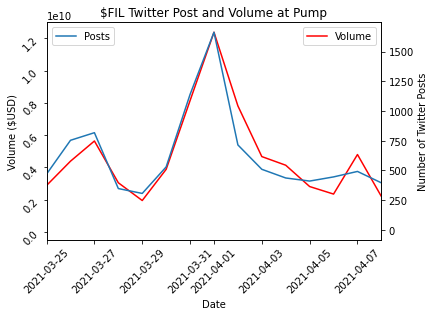

In [ ]:
# Twitter Posts and Coin Volume at Pump
fig, ax1 = plt.subplots()
ax1.xaxis_date()
ax2 = ax1.twinx()

plt.title('${} Twitter Post and Volume at Pump'.format(coin))
ax1.set_xlabel('Date')

ax1.set_ylabel('Volume (\$USD)'.format(coin))
ax1.plot(filledVolumeData.index, filledVolumeData, label="Volume", color='red')

ax2.set_ylabel('Number of Twitter Posts')
ax2.plot(twitterdf['Posts'].index, twitterdf['Posts'], label="Posts")
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")
ax1.set_xlim([pd.to_datetime('2021-03-25', format='%Y-%m-%d'), pd.to_datetime('2021-04-08', format='%Y-%m-%d')])
ax1.tick_params(labelrotation = 45)

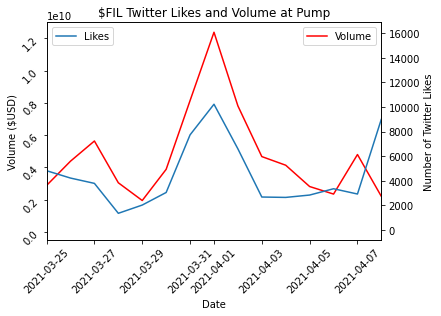

In [ ]:
# Twitter Likes and Coin Volume at Pump
fig, ax1 = plt.subplots()
ax1.xaxis_date()
ax2 = ax1.twinx()

plt.title('${} Twitter Likes and Volume at Pump'.format(coin))
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume (\$USD)')
ax1.plot(filledVolumeData.index, filledVolumeData, label="Volume", color='red')

ax2.set_ylabel('Number of Twitter Likes')
ax2.plot(twitterdf['Likes'].index, twitterdf['Likes'], label="Likes")
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")
ax1.set_xlim([pd.to_datetime('2021-03-25', format='%Y-%m-%d'), pd.to_datetime('2021-04-08', format='%Y-%m-%d')])
ax1.tick_params(labelrotation = 45)

####Price Correlation Graphs

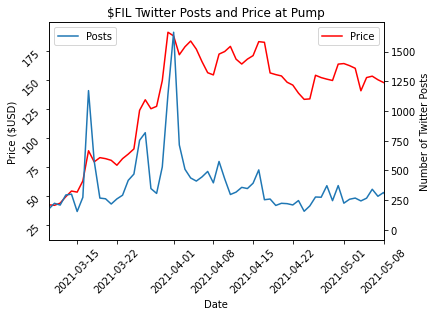

In [ ]:
# Twitter Posts and Coin Price at Pump
fig, ax1 = plt.subplots()
ax1.xaxis_date()
ax2 = ax1.twinx()

plt.title('${} Twitter Posts and Price at Pump'.format(coin))
ax1.set_xlabel('Date')

ax1.set_ylabel('Price ($USD)')
ax1.plot(filledPriceData.index, filledPriceData, label="Price", color='red')

ax2.set_ylabel('Number of Twitter Posts')
ax2.plot(twitterdf['Posts'].index, twitterdf['Posts'], label="Posts")
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")
ax1.set_xlim([pd.to_datetime('2021-03-10', format='%Y-%m-%d'), pd.to_datetime('2021-05-08', format='%Y-%m-%d')])
ax1.tick_params(labelrotation = 45)

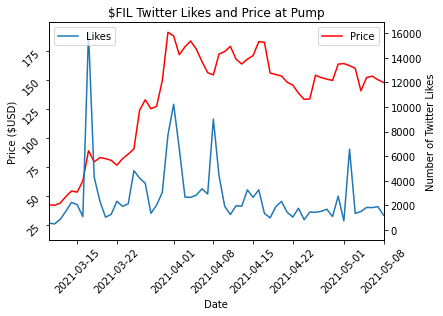

In [ ]:
# Twitter Likes and Coin Price at Pump
fig, ax1 = plt.subplots()
ax1.xaxis_date()
ax2 = ax1.twinx()

plt.title('${} Twitter Likes and Price at Pump'.format(coin))
ax1.set_xlabel('Date')

ax1.set_ylabel('Price ($USD)')
ax1.plot(filledPriceData.index, filledPriceData, label="Price", color='red')

ax2.set_ylabel('Number of Twitter Likes')
ax2.plot(twitterdf['Likes'].index, twitterdf['Likes'], label="Likes")
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")
ax1.set_xlim([pd.to_datetime('2021-03-10', format='%Y-%m-%d'), pd.to_datetime('2021-05-08', format='%Y-%m-%d')])
ax1.tick_params(labelrotation = 45)

###Reddit

In [ ]:
# Reddit Data
rawRedditData = pd.read_csv("/content/drive/Shareddrives/IW Spring 2022/Reddit Data/{}reddit.csv".format(coin), lineterminator='\n')

# Reddit Posts Per Day
rawRedditData['created_utc'] = [datetime.utcfromtimestamp(i).strftime('%Y-%m-%d') for i in rawRedditData['created_utc']]
filValueCounts2 = rawRedditData['created_utc'].value_counts()
filValueCounts2 = filValueCounts2.sort_index()

In [ ]:
filledRedditData=pd.Series(index=dtr)

for i in range (0, filValueCounts2.shape[0]):
  filledRedditData[filValueCounts2.index[i]] = filValueCounts2[i]
filledRedditData = filledRedditData.fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


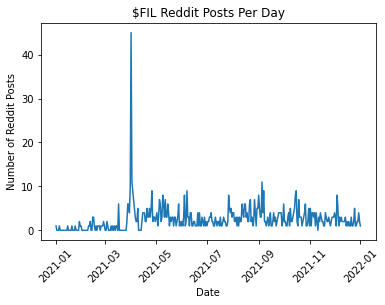

In [ ]:
fig, ax = plt.subplots()
ax.xaxis_date()
plt.title('${} Reddit Posts Per Day'.format(coin))
plt.xlabel('Date')
plt.ylabel('Number of Reddit Posts')
plt.xticks(rotation = 45)
plt.plot(filledRedditData.index, filledRedditData)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


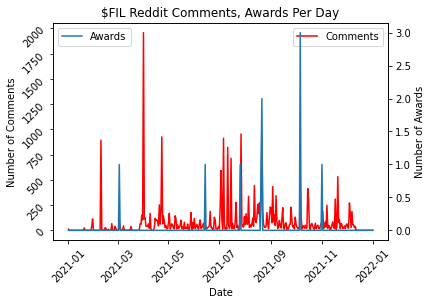

In [ ]:
# Reddit Comments, Awards Per Day
commentData = rawRedditData.groupby('created_utc')['num_comments'].sum()
awardData = rawRedditData.groupby('created_utc')['total_awards_received'].sum()
filledRedditCommentData=pd.Series(index=dtr)
filledRedditAwardData=pd.Series(index=dtr)
for i in range (0, commentData.shape[0]):
  filledRedditCommentData[commentData.index[i]] = commentData[i]
  filledRedditAwardData[awardData.index[i]] = awardData[i]
filledRedditCommentData = filledRedditCommentData.fillna(0)
filledRedditAwardData = filledRedditAwardData.fillna(0)

fig, ax1 = plt.subplots()
ax1.xaxis_date()
ax2 = ax1.twinx()

plt.title('${} Reddit Comments, Awards Per Day'.format(coin))
ax1.set_xlabel('Date')

ax1.set_ylabel('Number of Comments')
ax1.plot(filledRedditCommentData.index, filledRedditCommentData, label="Comments", color='red')

ax2.set_ylabel('Number of Awards')
ax2.plot(filledRedditAwardData.index, filledRedditAwardData, label="Awards")
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")
ax1.tick_params(labelrotation = 45)

In [ ]:
# Reddit Average Sentiment Polarity Each Day
sia = SentimentIntensityAnalyzer()
# custom words added to lexicon
new_words = {
    'moon': 5.0,
    'hold': 5.0,
    'hodl': 4.0,
    'ape': 3.0,
    'rocket': 5.0,
}
sia.lexicon.update(new_words)
rawRedditData['title'] = [sia.polarity_scores(i)['compound'] for i in rawRedditData['title']]
sentData = rawRedditData.groupby('created_utc')['title'].mean()
filledRedditSentData=pd.Series(index=dtr)
for i in range (0, sentData.shape[0]):
  filledRedditSentData[sentData.index[i]] = sentData[i]
filledRedditSentData = filledRedditSentData.fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


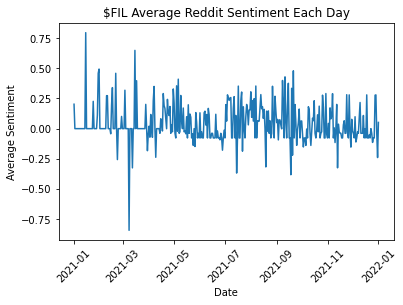

In [ ]:
fig, ax = plt.subplots()
ax.xaxis_date()
plt.title('${} Average Reddit Sentiment Each Day'.format(coin))
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation = 45)
plt.plot(filledRedditSentData.index, filledRedditSentData)

###Reddit Correlation Calculations

In [ ]:
# Reddit Correlation Calculations
redditData = {'Comments': filledRedditCommentData.values,
                'Awards': filledRedditAwardData.values,
                'Sentiment': filledRedditSentData.values,
                'Posts': filledRedditData.values,    
                }
redditdf = pd.DataFrame(redditData,columns=['Comments','Awards','Sentiment','Posts'], index=dtr)

In [ ]:
print(f'Post-Volume correlation:    ',np.corrcoef(filledVolumeData,redditdf['Posts'])[0,1])
print(f'Comment-Volume correlation: ',np.corrcoef(filledVolumeData,redditdf['Comments'])[0,1])
print(f'Awards-Volume correlation:  ',np.corrcoef(filledVolumeData,redditdf['Awards'])[0,1])
print(f'Sentiment-Volume:           ',np.corrcoef(filledVolumeData,redditdf['Sentiment'])[0,1],'\n')

print(f'Post-Price correlation:     ',np.corrcoef(filledPriceData,redditdf['Posts'])[0,1])
print(f'Comment-Price correlation:  ',np.corrcoef(filledPriceData,redditdf['Comments'])[0,1])
print(f'Awards-Price correlation:   ',np.corrcoef(filledPriceData,redditdf['Awards'])[0,1])
print(f'Sentiment-Price:            ',np.corrcoef(filledPriceData,redditdf['Sentiment'])[0,1])

Post-Volume correlation:     0.5610147890268816
Comment-Volume correlation:  0.31026813930289565
Awards-Volume correlation:   -0.013391990098974066
Sentiment-Volume:            0.04458011280673385 

Post-Price correlation:      0.4072507029609578
Comment-Price correlation:   0.16981224226143776
Awards-Price correlation:    -0.006541203980606898
Sentiment-Price:             0.053731268643515


###Reddit Correlation Graphs

####Volume Correlation Graphs

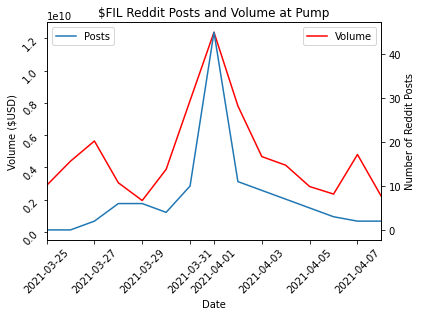

In [ ]:
# Reddit Posts and Coin Volume at Pump
fig, ax1 = plt.subplots()
ax1.xaxis_date()
ax2 = ax1.twinx()

plt.title('${} Reddit Posts and Volume at Pump'.format(coin))
ax1.set_xlabel('Date')

ax1.set_ylabel('Volume (\$USD)')
ax1.plot(filledVolumeData.index, filledVolumeData, label="Volume", color='red')

ax2.set_ylabel('Number of Reddit Posts')
ax2.plot(redditdf['Posts'].index, redditdf['Posts'], label="Posts")
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")
ax1.set_xlim([pd.to_datetime('2021-03-25', format='%Y-%m-%d'), pd.to_datetime('2021-04-08', format='%Y-%m-%d')])
ax1.tick_params(labelrotation = 45)

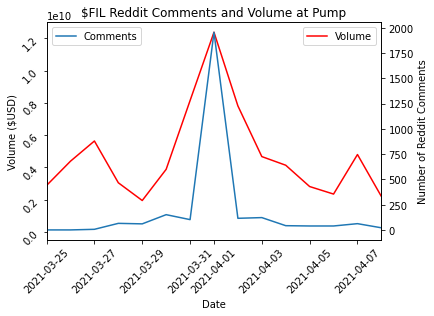

In [ ]:
# Reddit Comments and Coin Volume at Pump
fig, ax1 = plt.subplots()
ax1.xaxis_date()
ax2 = ax1.twinx()

plt.title('${} Reddit Comments and Volume at Pump'.format(coin))
ax1.set_xlabel('Date')

ax1.set_ylabel('Volume (\$USD)')
ax1.plot(filledVolumeData.index, filledVolumeData, label="Volume", color='red')

ax2.set_ylabel('Number of Reddit Comments')
ax2.plot(redditdf['Comments'].index, redditdf['Comments'], label="Comments")
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")
ax1.set_xlim([pd.to_datetime('2021-03-25', format='%Y-%m-%d'), pd.to_datetime('2021-04-08', format='%Y-%m-%d')])
ax1.tick_params(labelrotation = 45)

####Price Correlation Graphs

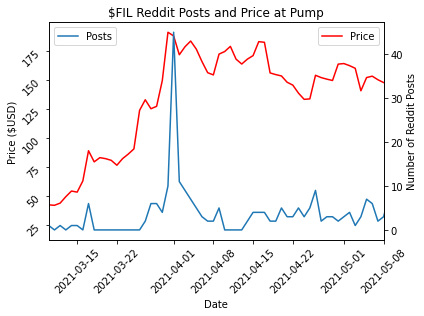

In [ ]:
# Reddit Posts and Coin Price at Pump
fig, ax1 = plt.subplots()
ax1.xaxis_date()
ax2 = ax1.twinx()

plt.title('${} Reddit Posts and Price at Pump'.format(coin))
ax1.set_xlabel('Date')

ax1.set_ylabel('Price ($USD)')
ax1.plot(filledPriceData.index, filledPriceData, label="Price", color='red')

ax2.set_ylabel('Number of Reddit Posts')
ax2.plot(redditdf['Posts'].index, redditdf['Posts'], label="Posts")
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")
ax1.set_xlim([pd.to_datetime('2021-03-10', format='%Y-%m-%d'), pd.to_datetime('2021-05-08', format='%Y-%m-%d')])
ax1.tick_params(labelrotation = 45)

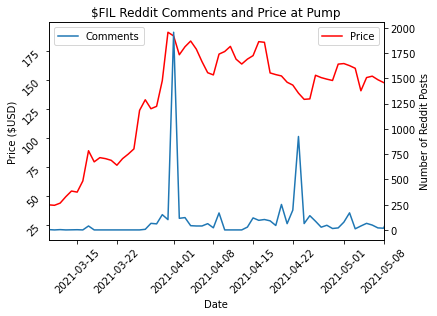

In [ ]:
# Reddit Comments and Coin Price at Pump
fig, ax1 = plt.subplots()
ax1.xaxis_date()
ax2 = ax1.twinx()

plt.title('${} Reddit Comments and Price at Pump'.format(coin))
ax1.set_xlabel('Date')

ax1.set_ylabel('Price ($USD)')
ax1.plot(filledPriceData.index, filledPriceData, label="Price", color='red')

ax2.set_ylabel('Number of Reddit Posts')
ax2.plot(redditdf['Comments'].index, redditdf['Comments'], label="Comments")
ax1.legend(loc="upper right")
ax2.legend(loc="upper left")
ax1.set_xlim([pd.to_datetime('2021-03-10', format='%Y-%m-%d'), pd.to_datetime('2021-05-08', format='%Y-%m-%d')])
ax1.tick_params(labelrotation = 45)